# Logistic Regression

Logistic regression is a classification algorithm that is used to predict a binary outcome based on a set of independent variables. \
Logistic regression uses a logistic function to estimate the probability of a target variable belonging to a particular class or category. \
\
Predicting Odds of Success: \
**[Exponent of the Log of the Odds Equation] = B0 + B1x** \
Thus, **[Odds Ratio] = [p(x)/1-p(x)] = e^(B0 + B1x)** \
\
Solving Further, we get, the equation of the Sigmoid Function: \
**p(x) = 1/1+e^-(B0 + B1x)**

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
print("Image Data Shape: ", digits.data.shape)
print("Label Data Shape: ", digits.target.shape)

Image Data Shape:  (1797, 64)
Label Data Shape:  (1797,)


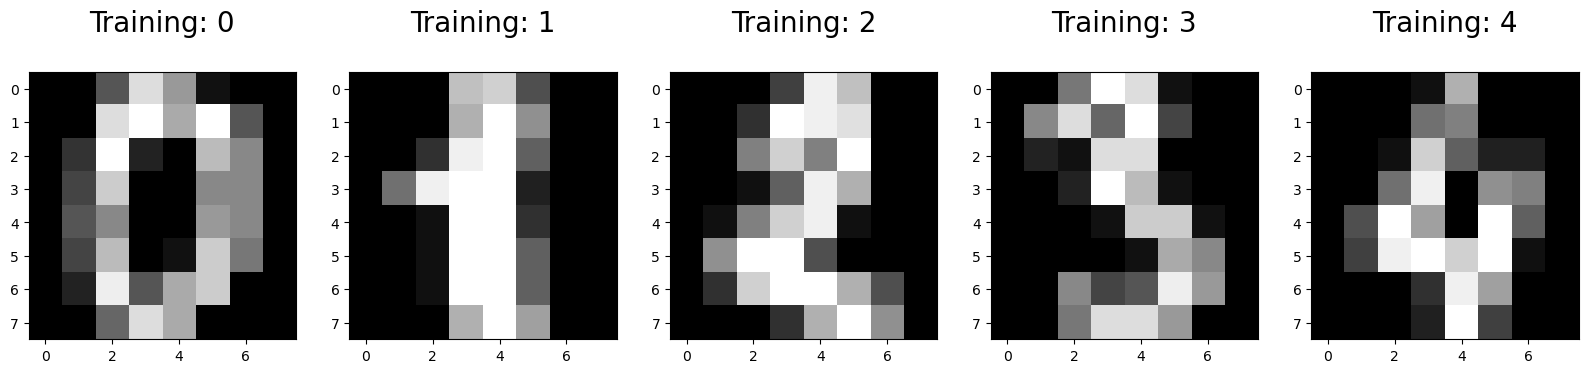

In [7]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize = 20)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=0)

In [9]:
print(X_train.shape)

(1383, 64)


In [10]:
print(X_test.shape)

(414, 64)


In [11]:
print(y_train.shape)

(1383,)


In [12]:
print(y_test.shape)

(414,)


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

C:\Users\sulet\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
print(lgr.predict(X_test[0].reshape(1, -1)))

[2]


In [17]:
lgr.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [20]:
predictions = lgr.predict(X_test)

In [21]:
score = lgr.score(X_test, y_test)
print(score)

0.961352657004831


In [23]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  2]
 [ 0  0 40  1  0  0  0  0  0  0]
 [ 0  0  1 38  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 41  0  0  0  2]
 [ 0  1  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  3  1  0  0  0  0  0 41  1]
 [ 0  0  0  0  0  1  0  0  0 42]]


Text(0.5, 1.0, 'Accuracy Score: 0.961352657004831')

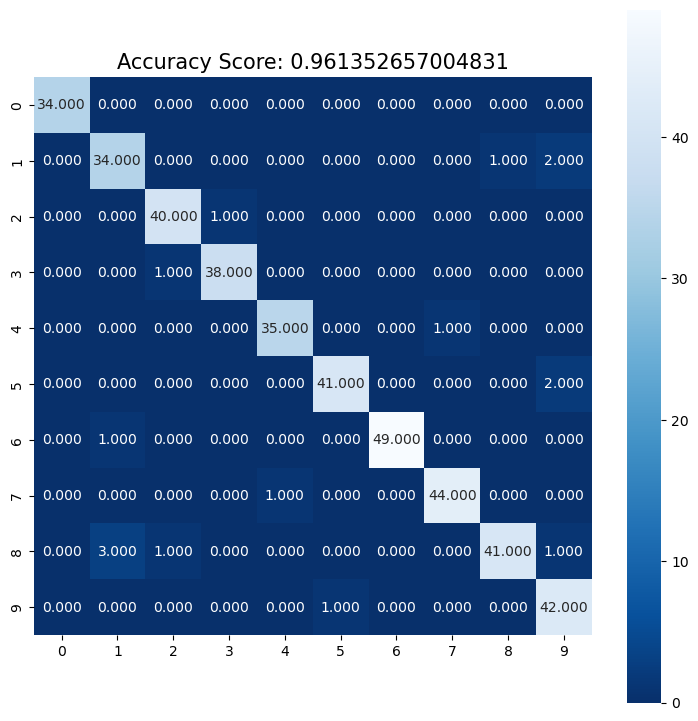

In [25]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", square=True, cmap="Blues_r")
plt.xlabel=("Predicted Label")
plt.ylabel=("Actual Label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15)

Since, the values in the diagonals are large, the model is reasonably accurate. 

<Figure size 2000x300 with 0 Axes>

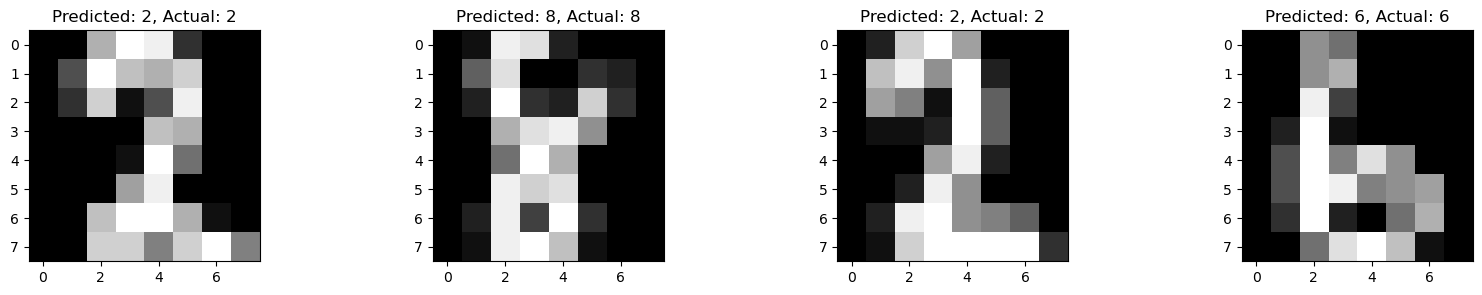

<Figure size 2000x300 with 0 Axes>

In [26]:
# Lets take a sample and see how the system has calssified

index=0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex+1)
    plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong], fontsize=20))
plt.figure(figsize=(20,3))